![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [25]:
# Start your code here!
import pandas as pd
import numpy as np

men_score = pd.read_csv('men_results.csv')
women_score = pd.read_csv('women_results.csv')

In [26]:
print(men_score.info())
print(women_score.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int

In [27]:
men_score["date"] = pd.to_datetime(men_score["date"])
women_score["date"] = pd.to_datetime(women_score["date"])

In [28]:
print(men_score["date"].dtype, women_score["date"].dtype)

datetime64[ns] datetime64[ns]


In [29]:
print(men_score.columns)

Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament'],
      dtype='object')


In [30]:
print(men_score["tournament"].unique())

['Friendly' 'British Home Championship' 'Évence Coppée Trophy'
 'Copa Lipton' 'Copa Newton' 'Copa Premio Honor Argentino'
 'Copa Premio Honor Uruguayo' 'Copa Roca' 'Copa América'
 'Copa Chevallier Boutell' 'Nordic Championship'
 'Central European International Cup' 'Baltic Cup' 'Balkan Cup'
 'FIFA World Cup' 'Copa Rio Branco' 'FIFA World Cup qualification'
 'Bolivarian Games' 'CCCF Championship' 'NAFC Championship'
 'Copa Oswaldo Cruz' 'Pan American Championship' 'Copa del Pacífico'
 "Copa Bernardo O'Higgins" 'AFC Asian Cup qualification' 'Atlantic Cup'
 'AFC Asian Cup' 'African Cup of Nations' 'Copa Paz del Chaco'
 'Merdeka Tournament' 'UEFA Euro qualification' 'UEFA Euro'
 'Windward Islands Tournament' 'African Cup of Nations qualification'
 'Vietnam Independence Cup' 'Copa Carlos Dittborn' 'Phillip Seaga Cup'
 'CONCACAF Championship' 'Copa Juan Pinto Durán' 'Arab Cup'
 'South Pacific Games' 'CONCACAF Championship qualification'
 'Copa Artigas' 'GaNEFo' "King's Cup" 'Gulf Cup' 'Indon

In [31]:
men_score = men_score[(men_score["date"] >= '2002-01-01') & (men_score["tournament"] == "FIFA World Cup")]
women_score = women_score[(women_score["date"] >= '2002-01-01') & (women_score["tournament"] == "FIFA World Cup")]

In [32]:
print(men_score.shape)
print(women_score.shape)

(384, 7)
(200, 7)


In [33]:
men_score["total_score"] = men_score['home_score'] + men_score["away_score"]
women_score["total_score"] = women_score['home_score'] + women_score["away_score"]

<AxesSubplot: ylabel='Frequency'>

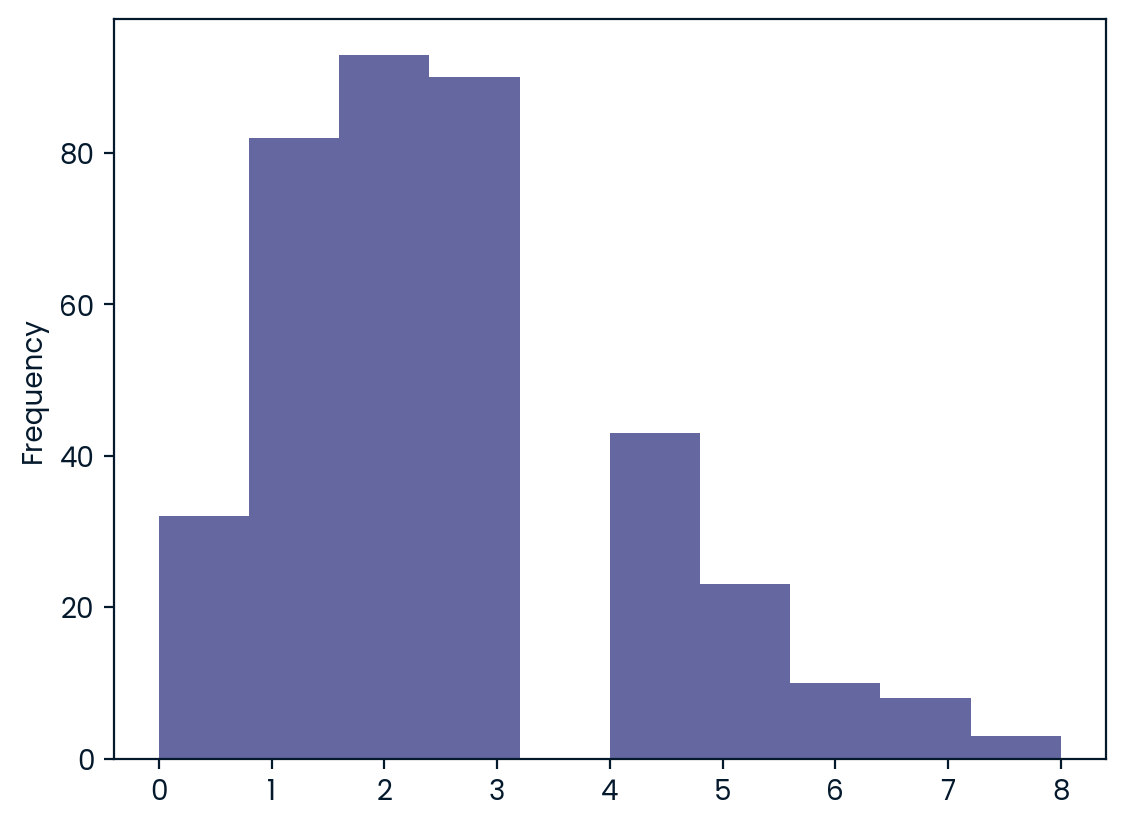

In [34]:
men_score["total_score"].plot(kind="hist")

<AxesSubplot: ylabel='Frequency'>

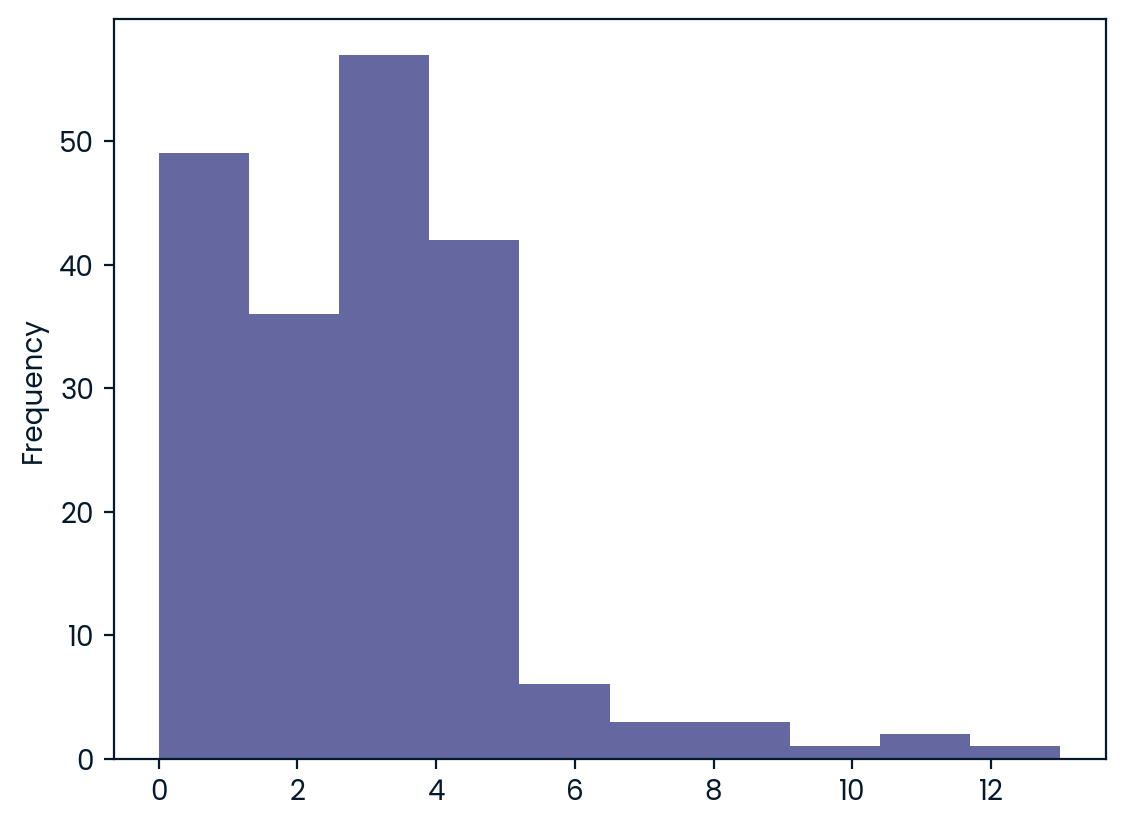

In [35]:
women_score["total_score"].plot(kind="hist")

In [36]:
import pingouin

p_val = pingouin.mwu(women_score["total_score"], men_score["total_score"], alternative="greater")["p-val"].item()
print(p_val)

0.005106609825443641


In [37]:
result_dict = {}
result_dict["p_val"] = p_val
if p_val < 0.1:
    result_dict["result"] = "reject"
else:
     result_dict["result"] = "fail to reject"
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
